In [1]:
from IPython.display import display, clear_output, Markdown, Javascript
import _spin_params as spin_pars
from _mbes import mbes_floquet, mbes, mbes_hp, mbes_floquet_hp
from _do_calculation import solve_mbes_floquet, solve_mbes
from _steady_state import a_steady, a_steady_hp
from _helper_functions import tsallis, cauchy, find_nearest_index
from _create_pdf import create_spins
import matplotlib.colors as colors
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
gcoll = spin_pars.gcoll
q = spin_pars.q
quali = spin_pars.quali
fr = spin_pars.fr
kappa = np.pi*fr/quali  # HWHM
delta = spin_pars.delta  # detuning cavity to spin central frequency ws-wc
deltac = spin_pars.deltac  # detuning drive to cavity wc-wp
gperp = spin_pars.gperp  # spin_pars.gperp #HWHM
gpar = spin_pars.gpar  # 0.001 #HWHM
gammaq = spin_pars.gammaq
nbins = spin_pars.nbins  # spin_pars.nbins#701#5000#20
g_number = spin_pars.g_number  # how many bins for inhomogeneous coupling
#g0 = gcoll/sqrt(nspins)
print(kappa)

8.214835923954617


Text(0, 0.5, '$\\rho(\\omega_s)$')

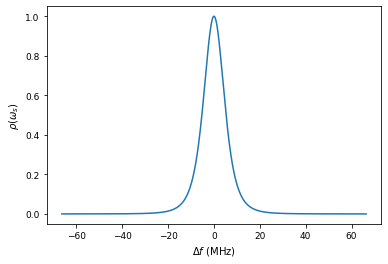

In [3]:
bool_holes = False
bool_inhomo = True
bool_hyperfine = False
spins, gs, pdf = create_spins(gcoll, q, delta, gammaq, nbins,
                              holes=bool_holes, inhomo=bool_inhomo, hyperfine=bool_hyperfine)

#pdf = np.array([1,1,1])
plt.figure()
plt.plot(spins, pdf/max(pdf))
plt.xlabel('$\Delta f$ (MHz)')
plt.ylabel('$\\rho(\omega_s)$')
#spins = np.array([-10,5,15])
#pdf = np.array([1,1,1])
#gs = pdf*gcoll/np.sqrt(3)

Text(0, 0.5, 'amplitude')

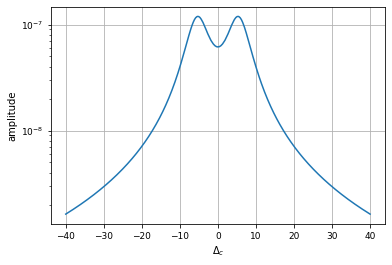

In [4]:
initsteady = (0.1, 0.1)
fstart = 40
deltaarr = np.linspace(-fstart*2*np.pi, fstart*2*np.pi, 500)
etasteady = 0.01

losasteady = np.zeros(np.shape(deltaarr))


newinit = initsteady
for i, delt in enumerate(deltaarr):
    ar, ai = a_steady(etasteady, delt, gs, spins, gpar, gperp, kappa, newinit)
    newinit = (ar, ai)
    losasteady[i] = ai**2+ar**2

fig = plt.figure()
# the minus here switches the direction
plt.semilogy(-deltaarr/2/np.pi, losasteady)
plt.grid(True)
plt.xlabel('$\Delta_c$')
plt.ylabel('amplitude')
#deltaarr[find(losasteady == max(losasteady))]/2/pi

## Cooperativity Pure

In [5]:
delta_0 = 2*np.pi*40  # pulse that produces 10MHz detuning
wgrund = 2*np.pi*7  # 500kHz frequency

gamma = gperp+gpar/2
deltaspins = 2*np.pi*spins
bracketspins = (gamma+1j*deltaspins)
sqrt1 = np.sqrt(bracketspins**2/(delta_0**2+bracketspins**2))
sqrt2 = 1/np.sqrt(1+delta_0**2/bracketspins**2)

coop = (gcoll**2/kappa*sum(pdf/(bracketspins)))
print(coop)

coop_pulse = (gcoll**2/kappa*sum(pdf*(sqrt1+sqrt2) /
                                 (2*(gamma + 1j * 2*np.pi*spins))))
print(coop_pulse)

(3.916874628630932+1.0869116866524508e-16j)
(0.4040558170949663-4.179280273902912e-19j)
